In [1]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')

import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns

import fix_yahoo_finance as fyf
from pandas_datareader import data as web
from datetime import datetime

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yeggy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

In [3]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [4]:
df = pd.read_csv('data/twitter_data_april.csv', low_memory = True, skipinitialspace=True)
text_df = df[['text']]
date_df = df[['date']]

In [5]:
analyzer = SentimentIntensityAnalyzer()

In [6]:
tweets = []

for rows in text_df.iterrows():
    tweets.append(rows[1].to_string(index=False))

In [7]:
scores = np.zeros(len(tweets))
sentimentScores = []

for i, text in enumerate(tweets):
    polarity = analyzer.polarity_scores(text)
    scores[i] = polarity['compound']
    sentimentScores.append(scores[i])

In [8]:
df["sentiment_score"] = sentimentScores

In [9]:
dates = []

for rows in date_df.iterrows():
    date = rows[1].to_string(index=False)
    d = date.split("-")
    d[-1] = d[-1].split(" ")[0]
    dates.append("-".join(d))

In [10]:
new_date = pd.DataFrame({'date': dates})
df.update(new_date)

In [11]:
df=df.loc[df['sentiment_score'] != 0]

In [12]:
df=df.sort_values(by='date', ascending=True)
df

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment_score
23343,71928,Daniel 🧢🥋🏴,"North Carolina, USA",Cryptoasset Advocate. Techno-philosopher. Scie...,2009-04-26 13:21:53,1105.0,4997,76743,False,2021-04-05,Tell someone not to explore altcoins is like t...,NaN,Twitter for Android,False,0.3612
23731,72316,CPCEarnings,NaN,"We show our earnings here, brought to you by C...",2021-03-15 03:47:33,14.0,2,3,False,2021-04-05,PROFIT! Just bagged 4.01% on a $WIN trade!\nJo...,"['WIN', 'DOGE', 'crypto']",CryptoTweeter.com,False,0.6390
23720,72305,Bitswings,NaN,Free Bitcoin Trading Dashboard https://t.co/5E...,2015-08-24 14:03:05,327.0,194,87,False,2021-04-05,[1D] #Bitcoin market is weakly trending up cur...,"['Bitcoin', 'wallstreet', 'btc']",BitSwingsTwit,False,-0.4215
23719,72304,PTC Webstar #NieMehrCDU,NaN,NaN,2013-09-15 21:19:40,266.0,615,4620,False,2021-04-05,Win 0.3BTC at the FREE #NFL Survivor Pool Cont...,"['NFL', 'Bitcoin', 'BTC', 'Sport', 'betting', ...","Cheap Bots, Done Quick!",False,0.8842
23715,72300,Awesome Android Games,NaN,"A website not just about Android games, but al...",2019-03-14 14:25:14,631.0,1079,1423,False,2021-04-05,Want to try your luck at the best online crypt...,NaN,TweetDeck,False,0.8176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27678,76263,Sinc,NaN,Tam bir ky,2021-02-12 11:00:05,5.0,117,115,False,2021-04-24,I hope it doesn't break.. #Bitcoin #btc #xbt h...,"['Bitcoin', 'btc', 'xbt']",Twitter Web App,False,0.4404
27681,76266,"Bet1Coin | Bitcoin Casino, Sportsbook, Poker",NaN,Everything you need to know about #bitcoin #ca...,2019-11-22 16:51:12,323.0,156,52,False,2021-04-24,I expect ⚡️#Sinner to reach its first #ATP 50...,"['Sinner', 'ATP', 'ATPBarcelona', 'odds', 'ten...",Twitter Web App,False,0.0258
27692,76277,𝐻𝒶𝓀𝓊𝓃𝒶𝓂𝒶𝓉𝒶𝓉𝒶 ♉️🧸,NaN,"Money and power don’t change you, they just fu...",2020-12-27 12:22:13,144.0,257,2721,False,2021-04-24,wooooowww btc dominance!! almost 50%\n\n#btcd ...,"['btcd', 'alts', 'btc', 'bitcoin']",Twitter Web App,False,0.3365
27697,76282,pocong digital terenkripsi,Indonesia,follow me at your own risk !!,2010-01-26 18:05:17,212.0,441,370,False,2021-04-24,FREE #Airdrops 1π!\nPi is a new digital curren...,"['Airdrops', 'PiNetwork', 'Bitcoin', 'BTT', 'T...",Twitter Web App,False,0.6514


In [13]:
sent_sub_df=df[['date','sentiment_score']]
sent_sub_df

,date,sentiment_score
23343,2021-04-05,0.3612
23731,2021-04-05,0.6390
23720,2021-04-05,-0.4215
23719,2021-04-05,0.8842
23715,2021-04-05,0.8176
...,...,...
27678,2021-04-24,0.4404
27681,2021-04-24,0.0258
27692,2021-04-24,0.3365
27697,2021-04-24,0.6514


In [14]:
sent_sub_df=round(sent_sub_df.groupby('date').mean(), 2)
sent_sub_df.reset_index(inplace=True)
sent_sub_df.rename(columns={'date':'Date'}, inplace=True)
sent_sub_df.reset_index(inplace=True)

In [15]:
sent_sub_df

,index,Date,sentiment_score
0,0,2021-04-05,0.30
1,1,2021-04-06,0.30
2,2,2021-04-07,0.25
3,3,2021-04-08,0.29
4,4,2021-04-09,0.12
5,5,2021-04-10,0.24
6,6,2021-04-11,0.28
7,7,2021-04-12,0.24
8,8,2021-04-17,0.36
9,9,2021-04-18,0.19


In [16]:
#fetching data
fyf.pdr_override()
today_date=datetime.today().strftime('%Y-%m-%d')
yf_data=web.get_data_yahoo('BTC-USD', start = '2013-01-01', end = today_date)
#bitcoin dataframe
bitcoin_df=pd.DataFrame(yf_data)
bitcoin_df.reset_index(inplace=True)
bitcoin_df

[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.86,468.17,452.42,457.33,457.33,21056800
1,2014-09-18,456.86,456.86,413.10,424.44,424.44,34483200
2,2014-09-19,424.10,427.83,384.53,394.80,394.80,37919700
3,2014-09-20,394.67,423.30,389.88,408.90,408.90,36863600
4,2014-09-21,408.08,412.43,393.18,398.82,398.82,26580100
...,...,...,...,...,...,...,...
2446,2021-06-02,36699.92,38231.34,35966.31,37575.18,37575.18,33070867190
2447,2021-06-03,37599.41,39478.95,37243.97,39208.77,39208.77,35460750427
2448,2021-06-04,39242.48,39242.48,35717.72,36894.41,36894.41,41831090187
2449,2021-06-05,36880.16,37917.71,34900.41,35551.96,35551.96,35959473399


In [17]:
#Price Difference
bitcoin_df['Price_Diff']=bitcoin_df['Adj Close']-bitcoin_df['Adj Close'].shift(-1)
bitcoin_df

,Date,Open,High,Low,Close,Adj Close,Volume,Price_Diff
0,2014-09-17,465.86,468.17,452.42,457.33,457.33,21056800,32.89
1,2014-09-18,456.86,456.86,413.10,424.44,424.44,34483200,29.64
2,2014-09-19,424.10,427.83,384.53,394.80,394.80,37919700,-14.10
3,2014-09-20,394.67,423.30,389.88,408.90,408.90,36863600,10.08
4,2014-09-21,408.08,412.43,393.18,398.82,398.82,26580100,-3.33
...,...,...,...,...,...,...,...,...
2446,2021-06-02,36699.92,38231.34,35966.31,37575.18,37575.18,33070867190,-1633.59
2447,2021-06-03,37599.41,39478.95,37243.97,39208.77,39208.77,35460750427,2314.36
2448,2021-06-04,39242.48,39242.48,35717.72,36894.41,36894.41,41831090187,1342.45
2449,2021-06-05,36880.16,37917.71,34900.41,35551.96,35551.96,35959473399,-310.42


In [18]:
#Direction: 0-Negative 1-Positive
bitcoin_df['PD_Direction'] = np.where(bitcoin_df.eval("Price_Diff < 0"), 0, 1)
bitcoin_df

,Date,Open,High,Low,Close,Adj Close,Volume,Price_Diff,PD_Direction
0,2014-09-17,465.86,468.17,452.42,457.33,457.33,21056800,32.89,1
1,2014-09-18,456.86,456.86,413.10,424.44,424.44,34483200,29.64,1
2,2014-09-19,424.10,427.83,384.53,394.80,394.80,37919700,-14.10,0
3,2014-09-20,394.67,423.30,389.88,408.90,408.90,36863600,10.08,1
4,2014-09-21,408.08,412.43,393.18,398.82,398.82,26580100,-3.33,0
...,...,...,...,...,...,...,...,...,...
2446,2021-06-02,36699.92,38231.34,35966.31,37575.18,37575.18,33070867190,-1633.59,0
2447,2021-06-03,37599.41,39478.95,37243.97,39208.77,39208.77,35460750427,2314.36,1
2448,2021-06-04,39242.48,39242.48,35717.72,36894.41,36894.41,41831090187,1342.45,1
2449,2021-06-05,36880.16,37917.71,34900.41,35551.96,35551.96,35959473399,-310.42,0


In [19]:
mask=(bitcoin_df['Date'] >= '2021-04-05') & (bitcoin_df['Date'] <= '2021-04-24')
bitcoin_df = bitcoin_df.loc[mask]
bitcoin_df

,Date,Open,High,Low,Close,Adj Close,Volume,Price_Diff,PD_Direction
2388,2021-04-05,58760.88,59891.30,57694.82,59057.88,59057.88,60706272115,865.52,1
2389,2021-04-06,59171.93,59479.58,57646.81,58192.36,58192.36,66058027988,2143.42,1
2390,2021-04-07,58186.51,58731.14,55604.02,56048.94,56048.94,75645303584,-2275.01,0
2391,2021-04-08,56099.91,58338.74,55879.09,58323.95,58323.95,53053855641,78.95,1
2392,2021-04-09,58326.56,58937.05,57807.86,58245.00,58245.00,46655208546,-1548.23,0
2393,2021-04-10,58253.78,61276.66,58038.71,59793.23,59793.23,58238470525,-411.73,0
2394,2021-04-11,59846.23,60790.55,59289.80,60204.96,60204.96,46280252580,311.51,1
2395,2021-04-12,60175.95,61253.04,59589.88,59893.45,59893.45,51828688519,-3610.01,0
2396,2021-04-13,59890.02,63742.29,59869.96,63503.46,63503.46,69983454362,393.76,1
2397,2021-04-14,63523.75,64863.10,61554.80,63109.70,63109.70,77451779687,-204.31,0


In [20]:
#final Bitcoin-subdf
bitcoin_sub_df=bitcoin_df[['Date', 'Price_Diff', 'PD_Direction']]
bitcoin_sub_df.reset_index(inplace=True)
bitcoin_sub_df.reset_index(inplace=True)
bitcoin_sub_df.drop(columns='index', inplace=True)
bitcoin_sub_df.rename(columns={'level_0':'index'}, inplace=True)
bitcoin_sub_df

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,index,Date,Price_Diff,PD_Direction
0,0,2021-04-05,865.52,1
1,1,2021-04-06,2143.42,1
2,2,2021-04-07,-2275.01,0
3,3,2021-04-08,78.95,1
4,4,2021-04-09,-1548.23,0
5,5,2021-04-10,-411.73,0
6,6,2021-04-11,311.51,1
7,7,2021-04-12,-3610.01,0
8,8,2021-04-13,393.76,1
9,9,2021-04-14,-204.31,0


In [21]:
bitcoin_sub_df = bitcoin_sub_df.drop(bitcoin_sub_df.index[[8, 9, 10,11]])
bitcoin_sub_df.drop(columns='index', inplace=True)
bitcoin_sub_df.reset_index(inplace=True)
bitcoin_sub_df


,index,Date,Price_Diff,PD_Direction
0,0,2021-04-05,865.52,1
1,1,2021-04-06,2143.42,1
2,2,2021-04-07,-2275.01,0
3,3,2021-04-08,78.95,1
4,4,2021-04-09,-1548.23,0
5,5,2021-04-10,-411.73,0
6,6,2021-04-11,311.51,1
7,7,2021-04-12,-3610.01,0
8,12,2021-04-17,4467.64,1
9,13,2021-04-18,491.91,1


In [22]:
bitcoin_sub_df.drop(columns='index', inplace=True)
bitcoin_sub_df.reset_index(inplace=True)
bitcoin_sub_df


,index,Date,Price_Diff,PD_Direction
0,0,2021-04-05,865.52,1
1,1,2021-04-06,2143.42,1
2,2,2021-04-07,-2275.01,0
3,3,2021-04-08,78.95,1
4,4,2021-04-09,-1548.23,0
5,5,2021-04-10,-411.73,0
6,6,2021-04-11,311.51,1
7,7,2021-04-12,-3610.01,0
8,8,2021-04-17,4467.64,1
9,9,2021-04-18,491.91,1


In [23]:
merge_df=bitcoin_sub_df.merge(sent_sub_df, on='index', how='left')
merge_df

,index,Date_x,Price_Diff,PD_Direction,Date_y,sentiment_score
0,0,2021-04-05,865.52,1,2021-04-05,0.30
1,1,2021-04-06,2143.42,1,2021-04-06,0.30
2,2,2021-04-07,-2275.01,0,2021-04-07,0.25
3,3,2021-04-08,78.95,1,2021-04-08,0.29
4,4,2021-04-09,-1548.23,0,2021-04-09,0.12
5,5,2021-04-10,-411.73,0,2021-04-10,0.24
6,6,2021-04-11,311.51,1,2021-04-11,0.28
7,7,2021-04-12,-3610.01,0,2021-04-12,0.24
8,8,2021-04-17,4467.64,1,2021-04-17,0.36
9,9,2021-04-18,491.91,1,2021-04-18,0.19


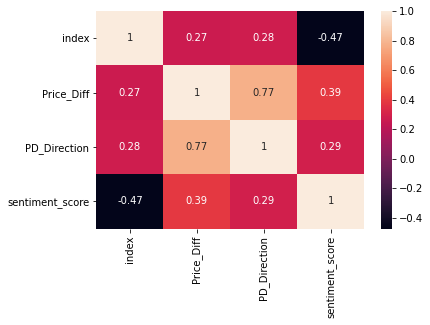

                    index  Price_Diff  PD_Direction  sentiment_score
index            1.000000    0.268534      0.277884        -0.472572
Price_Diff       0.268534    1.000000      0.771870         0.386445
PD_Direction     0.277884    0.771870      1.000000         0.291544
sentiment_score -0.472572    0.386445      0.291544         1.000000


In [24]:
corrMatrix = merge_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
print(corrMatrix)

In [25]:
# Import Tweet data
tweet_df = pd.read_csv("data/twitter_data_april.csv")
tweet_df.head(5)

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,48583,Phoenix Capital 🔥,NaN,24/7 live finance updates with the occasional ...,2018-01-09 21:44:04,880.0,828,19996,False,2021-04-12 18:56:10,The Why Behind Microsoft’s $19 Billion Nuance ...,"['Bitcoin', 'Btc', 'Cryptocurrency', 'Finance'...",startbitcoinclick,False
1,48584,Haylie lewis,"New York, USA",🌺🌺,2020-08-17 01:08:05,4.0,51,14,False,2021-04-12 18:55:48,Make a change and an impart on yourself and ot...,"['bitcoin', 'cryptocurrency', 'crypto', 'block...",Twitter for iPhone,False
2,48585,Gep.Apex 🥦🦕,The World,@playapex PS4-player since S1 on YouTube! 🦕\n\...,2020-03-31 13:53:20,411.0,4052,3697,False,2021-04-12 18:55:27,What are the biggest shitcoins? #crypto #btc #...,"['crypto', 'btc', 'bnb', 'binance', 'bitcoin',...",Twitter Web App,False
3,48586,CryptoCash 305🇺🇸🇩🇴,"Miami, FL",🏅Crypto Trader🎯🎲📈\n🏅Crypto investor💰💸\n#Bitcoi...,2017-07-07 02:40:06,1527.0,218,1678,False,2021-04-12 18:55:22,#crypto #bitcoin #cryptocurrency #blockchain #...,"['crypto', 'bitcoin', 'cryptocurrency', 'block...",Twitter for Android,False
4,48587,Bitswings,NaN,Free Bitcoin Trading Dashboard https://t.co/5E...,2015-08-24 14:03:05,327.0,193,87,False,2021-04-12 18:55:01,[1D] #Bitcoin market is weakly trending up cur...,"['Bitcoin', 'binaryoption', 'btc']",BitSwingsTwit,False


In [26]:
# Import Bitcoin price data
price_df = pd.read_csv("data/bitcoin_price.csv", index_col = 0)
price_df.head(5)

,Date,Open,High,Low,Close,Adj_Close,Volume,SMA10,SMA30,EMA20,...,VROC30,RSI14,RSI14_IND,STOK14,STOK200,STOD14,BBandUpper,BBandLower,Price_Diff,PD_Direction
2384,2021-04-01,58926.56,59586.07,58505.28,59095.81,59095.81,61669163792,56096.148,55534.127667,56212.601774,...,29.745422,54.126540,2,89.803722,94.978855,94.753487,61743.471597,52222.693403,-288.50,0
2385,2021-04-02,59098.88,60267.19,58869.28,59384.31,59384.31,58727860620,56560.684,55828.996667,56514.669224,...,10.347547,53.508505,2,90.618259,95.534689,95.049678,61364.319040,52415.967960,1780.42,1
2386,2021-04-03,59397.41,60110.27,57603.89,57603.89,57603.89,59641344484,57043.646,56130.420667,56618.404536,...,13.941528,47.853820,2,71.698995,92.077434,94.196993,61149.202166,52461.241834,-1154.66,0
2387,2021-04-04,57604.84,58913.75,57168.68,58758.55,58758.55,50749662970,57749.085,56458.129000,56822.227913,...,4.367493,53.654311,2,83.968750,94.319576,93.977233,61354.382991,52541.196009,-299.33,0
2388,2021-04-05,58760.88,59891.30,57694.82,59057.88,59057.88,60706272115,58141.142,56796.312333,57035.147160,...,76.658832,65.941014,2,87.149518,94.900821,93.765944,61565.735569,52555.141431,865.52,1


In [27]:
# Define chosen columns of Tweet dataframe to focus on
chosen_column_tweet = ['user_name', 'date','user_followers', 'user_friends', 'user_favourites']

In [28]:
# Filter Tweet dataframe with chosen columns
tweet_edited_df = tweet_df[chosen_column_tweet]
tweet_edited_df.date.sort_values()

25156    2021-04-05 11:43:09
25155    2021-04-05 11:45:58
25154    2021-04-05 11:46:58
25153    2021-04-05 11:47:04
25152    2021-04-05 11:47:16
                ...         
25161    2021-04-24 23:55:40
25160    2021-04-24 23:56:05
25159    2021-04-24 23:56:07
25158    2021-04-24 23:58:52
25157    2021-04-24 23:59:33
Name: date, Length: 58060, dtype: object

In [29]:
# Clean data: Delete row with incorrect data type in column date
tweet_edited_df = tweet_edited_df[tweet_edited_df['date'].apply(lambda x: x != "['ETH', 'BTC', 'Bitcoin']")]
tweet_edited_df.head(5)

,user_name,date,user_followers,user_friends,user_favourites
0,Phoenix Capital 🔥,2021-04-12 18:56:10,880.0,828,19996
1,Haylie lewis,2021-04-12 18:55:48,4.0,51,14
2,Gep.Apex 🥦🦕,2021-04-12 18:55:27,411.0,4052,3697
3,CryptoCash 305🇺🇸🇩🇴,2021-04-12 18:55:22,1527.0,218,1678
4,Bitswings,2021-04-12 18:55:01,327.0,193,87


In [30]:
adj_close = []
volume = []
price_diff = []
price_direction = []
for index_tweet, row_tweet in tweet_edited_df.iterrows():
    for index_price, row_price in price_df.iterrows():
        if row_price['Date'] in row_tweet['date']:
            adj_close.append(row_price['Adj_Close'])
            volume.append(row_price['Volume'])
            price_diff.append(row_price['Price_Diff'])
            price_direction.append(row_price['PD_Direction'])

In [31]:
# Create a new DF from Twitter DF
twitter_bitcoin_df = tweet_edited_df

In [32]:
# Add new Bitcoin price data columns to Tweet dataframe
twitter_bitcoin_df['Adj_Close'] = adj_close
twitter_bitcoin_df['Price_Diff'] = price_diff

In [33]:
# Categorize Price_Diff into bins
twitter_bitcoin_df['Price_Diff_Range'] = pd.cut(twitter_bitcoin_df.Price_Diff
                                             , bins = [-4000, -3000, -2000, -1000, 0, 1000, 2000, 3000, 4000, 5000]
                                             , labels =['-4000 to -3000', '-3000 to -2000' ,'-2000 to -1000'
                                                        ,'-1000 to 0', '0 to 1000', '1000 to 2000', '2000 to 3000'
                                                        , '3000 to 4000', '4000 to 5000']
                                             , right=False)

twitter_bitcoin_df.head()

,user_name,date,user_followers,user_friends,user_favourites,Adj_Close,Price_Diff,Price_Diff_Range
0,Phoenix Capital 🔥,2021-04-12 18:56:10,880.0,828,19996,59893.45,-3610.01,-4000 to -3000
1,Haylie lewis,2021-04-12 18:55:48,4.0,51,14,59893.45,-3610.01,-4000 to -3000
2,Gep.Apex 🥦🦕,2021-04-12 18:55:27,411.0,4052,3697,59893.45,-3610.01,-4000 to -3000
3,CryptoCash 305🇺🇸🇩🇴,2021-04-12 18:55:22,1527.0,218,1678,59893.45,-3610.01,-4000 to -3000
4,Bitswings,2021-04-12 18:55:01,327.0,193,87,59893.45,-3610.01,-4000 to -3000


### KNN on Price_Diff_Range:
In this model, we are trying to determine if number of followers, 
friends, and favourites of a user who posted a tweet as well as value of
Adjusted Close of Bitcoin price at the day that tweet is posted can help
predict the range in Bitcoin's price change in that day

In [34]:
twitter_bitcoin_df.iloc[:, 2:6]

,user_followers,user_friends,user_favourites,Adj_Close
0,880.0,828,19996,59893.45
1,4.0,51,14,59893.45
2,411.0,4052,3697,59893.45
3,1527.0,218,1678,59893.45
4,327.0,193,87,59893.45
...,...,...,...,...
58055,4045.0,0,0,60683.82
58056,14.0,0,0,60683.82
58057,1325.0,159,59,60683.82
58058,275.0,162,2378,60683.82


In [35]:
# Declare features for X and y
X = twitter_bitcoin_df.iloc[:, 2:6]
y = twitter_bitcoin_df.iloc[:, -1]

In [36]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [37]:
# Encode y_train and y_test
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)
y_test_encoded = lab_enc.fit_transform(y_test)

In [38]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train_encoded)
knn.score(X_train, y_train_encoded)
y_pred = knn.predict(X_test)

In [39]:
# Predictions result
print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1564
           1       0.75      0.85      0.80       693
           2       0.88      0.89      0.88       826
           3       0.88      0.80      0.83       373
           4       0.93      0.90      0.92      3595
           5       0.98      0.98      0.98      1943
           6       0.94      0.91      0.93      2564
           7       1.00      0.76      0.86        54

    accuracy                           0.91     11612
   macro avg       0.90      0.88      0.89     11612
weighted avg       0.92      0.91      0.92     11612



In [40]:
print("Accuracy score: ", accuracy_score(y_test_encoded, y_pred))
print("Recall score: ", recall_score(y_test_encoded, y_pred, average = 'weighted'))
print("Precision score: ", precision_score(y_test_encoded, y_pred, average = 'weighted'))
print("F1 score: ", f1_score(y_test_encoded, y_pred, average = 'weighted'))

Accuracy score:  0.9149156045470204
Recall score:  0.9149156045470204
Precision score:  0.916944917914353
F1 score:  0.915371281456425


Text(91.68, 0.5, 'predicted label')

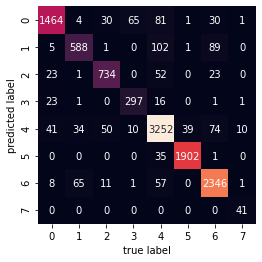

In [41]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Decision Tree on Price_Direction:
In this model, we are trying to determine if number of followers, friends, and favourites of a user who posted a tweet as well as value of Adjusted Close and Volume of Bitcoin price at the day that tweet is posted can help predict the direction of price change in that day

In [42]:
# Add column Volume and Price Direction to the dataframe
twitter_bitcoin_df['Volume'] = volume
twitter_bitcoin_df['Price_Direction'] = price_direction

In [43]:
X = twitter_bitcoin_df.iloc[:, [2,3,4,5,8]]
y = twitter_bitcoin_df.iloc[:, -1]

In [44]:
seed = 10
kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 50

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [45]:
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
prediction_scores = cross_val_score(model, X, y, cv=kfold)

In [46]:
prediction_scores.mean()

0.823940750947296